## 1. Giới thiệu chung về Recommendation trong Neural Network

Ở bài trước chúng ta đã tìm hiểu về 2 thuật toán cơ bản trong recommendation đó là [collaborative và content-based filtering](https://phamdinhkhanh.github.io/2019/11/04/Recommendation_Compound_Part1.html). Ý tưởng chung của các thuật toán này đều là tìm cách ước lượng các giá trị rating value của những user-item chưa được rate bởi người dùng sao cho sai số so với giá trị thực tế là nhỏ nhất.

Tuy nhiên những phương pháp này đều có một hạn chế đó là:

* Nếu một user hoặc item chưa từng xuất hiện trong database thì sẽ không thể xây dựng được phương trình hồi qui để dự báo rating cho sản phẩm. Do đó không thể khuyến nghị được cho khách hàng mới.

* Những sản phẩm được sử dụng phổ biến và sản phẩm có rating cao thì xuất hiện trong hầu hết các khuyến nghị. Điều đó chứng tỏ tính cá nhân hóa của những thuật toán này chưa cao.

Để khắc phục hạn chế này chúng ta dựa vào một phương pháp học sâu dựa trên mạng Neural Network giúp xây dựng một véc tơ embedding nhằm trích suất các đặc trưng của người dùng và sản phẩm. Từ đó có thể dễ dàng áp dụng để:

* Tìm ra các sản phẩm tương đồng hoặc tập khách hàng tương đồng dựa trên các thước đo như hệ số tương quan cosine similarity hoặc dot product.

* Ước lượng được điểm số mà một khách hàng sẽ vote cho một sản phẩm để khuyến nghị những sản phẩm mà khách hàng yêu thích nhất.
 
Phương pháp neural network tận dụng được đồng thời đầu vào là véc tơ các trường thông tin sản phẩm và véc tơ các trường thông tin khách hàng nên tính cá nhân hóa cao, khắc phục được các hạn chế về tính cá nhân hóa thấp của những phương pháp truyền thống. Bên cạnh đó, việc sử dụng các trường thông tin mang tính đặc thù cao giúp cho các khuyến nghị sản phẩm có yếu tố phân cụm cao. Chẳng hạn như đối với một hệ thống recommendation video của youtube,thông thường các kết quả video sẽ bị phân cụm theo ngôn ngữ của người dùng. Nếu khách hàng là người Việt Nam thường những video được khuyến nghị sẽ là video tiếng Việt. 

Ngoài ra, một trong những ưu điểm của mô hình recommendation mạng neural đó là chúng ta có thể sử dụng không giới hạn bất kì thông tin nào liên quan đến khách hàng và sản phẩm.

Trong khi đó đối với mô hình collaborative-filtering ta chỉ sử dụng thông tin duy nhất là ma trận rating sản phẩm. Còn trong mô hình content-based chỉ tận dụng được chỉ một trong hai nhóm thông tin về khách hàng hoặc về sản phẩm.

Những thông tin này rất hữu ích trong cá nhân hóa khuyến nghị cho người dùng. Đặc biệt là những trường thông tin cho thấy sự khác biệt về sở thích như giới tính, độ tuổi, ngành nghề, quốc tịch,.... Một số ví dụ rất cụ thể để ta dễ hình dung:

* Tùy theo quốc tịch mà người dùng sẽ có những thị hiếu khác nhau như người Việt Nam thích ăn thịt chó nhưng người phương Tây thì tuyệt đối không.

* Nam thích bóng đá, hút thuốc, đồ điện tử và công nghệ thông tin còn nữ thích thời trang, mỹ phẩm-làm đẹp, chăm sóc sức khỏe, nội trợ.

* Ta không thể khuyến nghị đồ chơi trẻ em cho người lớn và trái lại thuốc lá cho trẻ em. Hoặc với nam thì không nên recommend túi xách, váy (trừ khi họ mua cho bạn gái, vợ, người thân) hoặc nữ là áo sơ mi nam.

Trên thực tế cũng cho thấy số lượng trường dữ liệu đối với khách hàng hoặc đối với sản phẩm ở một số hệ thống là rất lớn. Có thể lên tới vài trăm hoặc thậm chí vài nghìn chiều. Do đó mô hình recommendation mạng neural network sẽ tận dụng được số lượng rất lớn các trường thông tin này, cả từ phía người dùng lẫn sản phẩm. Do đó tính cá nhân hóa của các kết quả khuyến nghị là cực kì cao. 

Ngoài ra mô hình mạng neural network có ưu điểm đó là không giới hạn dữ liệu đầu vào là các biến numeric hoặc category. Thông tin từ các bức ảnh, hoặc các đoạn văn bản mô tả thuộc tính sản phẩm đôi khi cũng rất có ích trong khuyến nghị sản phẩm. Chúng có thể được dễ dàng đưa vào mô hình thông qua các phương pháp nhúng. Và thường thì những thuật toán sử dụng thêm những dữ liệu này lại có kết quả tốt hơn.

Chính vì những ưu điểm kể trên mà mô hình recommendation mạng neural network mang lại hiệu quả cao hơn so với các phương pháp cũ. Tiếp theo hãy cùng tìm hiểu về kiến trúc mô hình và nguyên lý hoạt động của một hệ thống recommendation qua mạng neural network như thế nào nhé.

# 2. Kiến trúc recommendation neural network

Kiến trúc của recommendation neural network là một mạng neural khá đơn giản với input đầu vào của mô hình là các thông tin về khách hàng như lịch sử truy vấn, hành vi giao dịch, các biến demographic bao gồm giới tính, độ tuổi, nghề nghiệp, quốc gia,.... Đầu ra của mô hình là một véc tơ phân phối điểm số hoặc khả năng tương tác của khách hàng đối với các sản phẩm. Tùy vào các bài toán khác nhau mà việc tiền xử lý đầu ra và xác định bài toán dự báo cho đầu ra cũng là một vấn đề rất đa dạng và linh hoạt mà chúng ta sẽ tìm hiểu ở phần thực hành.

Bên dưới là kiến trúc của một mô hình recommendation neural network:

![](https://res.cloudinary.com/practicaldev/image/fetch/s--gO-DugEP--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://thepracticaldev.s3.amazonaws.com/i/fkea7x22mlx914xeixsb.jpg)

> **Hình 1:** Mô hình neural network recommendation. Ở mô hình này chúng ta sẽ có Input layer là những thông tin của khách hàng, thông tin sản phẩm, lịch sử giao dịch hoặc truy vấn. Những đầu vào này có thể được coi như là thông tin truy vấn (query). Một hidden layer trung gian để giảm chiều dữ liệu và chuyển đổi tính phi tuyến và output layer là một véc tơ phân phối xác suất về khả năng ưa thích hoặc một véc tơ embedding điểm rating của khách hàng.

Như vậy về bản chất mô hình này chính là một mạng MLP thông thường giúp dự báo sản phẩm khách hàng sẽ yêu thích dựa trên các dữ liệu lịch sử hành vi của khách hàng. Kiến trúc này khá đơn giản phải không? Đầu vào của mạng nơ ron là các véc tơ véc tơ $\mathbf{x}_i \in \mathbb{R}^{d\times 1}$ đại diện cho véc tơ concatenate các đặc trưng về sản phẩm và các đặc trưng của khách hàng dựa trên những gì khách hàng đã giao dịch, véc tơ này có kích thước $d$ chiều. Khi đó thông qua một phép chiếu tuyến tính (linear projection) bằng cách nhân với ma trận hệ số $\mathbf{W}^{(1)} \in \mathbb{R}^{d \times h}$ ta sẽ giảm chiều dữ liệu của véc tơ input về véc tơ $\mathbf{z} \in \mathbb{R}^{h \times 1}$, với $h$ là số units của hidden layer.

$$\mathbf{z}_i = {\mathbf{W}^{(1)}}^\top\mathbf{x}_i, \mathbf{z}_i \in \mathbb{R}^{h \times 1}$$

Để thay đổi tính phi tuyến thì hàm activation relu hoặc sigmoid sẽ được áp dụng ở ngay lên output của layer liền trước. Khi đó output sẽ có dạng:

$$\mathbf{a}_i = f(\mathbf{z}_i) \in \mathbb{R}^{h \times 1}$$

$f(\mathbf{x})$ chính là hàm relu hoặc softmax. Biến đổi trên có thể coi là một phép biến đổi không gian qua kernel hàm $f(\mathbf{x})$ để thay đổi mối quan hệ đầu vào và đầu ra từ tuyến tính sang phi tuyến. Khi đó ta có thể xem các giá trị $f(\mathbf{z}) \in \mathbb{R}^{h\times 1}$ như là một véc tơ user embedding đại diện cho hành vi, sở thích, thị hiếu của mỗi user.

Để tính toán phân phối xác suất ở đầu ra ta sử dụng hàm softmax áp dụng lên các đầu vào là các $\mathbf{a}_i$. Như vậy giá trị xác suất của khách hàng thứ $i$ khi ưa thích sản phẩm thứ $j$ sẽ chính là:
$$\hat{y}_{ij}=P(y_i=j|\mathbf{a}_i, j=\overline{1,o}) = \frac{\text{exp}(\mathbf{a}_i^T\mathbf{w}_j^{(2)})}{\sum_{k=1}^{o} \text{exp}(\mathbf{a}_i^T\mathbf{w}_k^{(2)})}$$

Ở đây $\mathbf{w}_k^{(2)} \in \mathbb{R}^{h \times 1}$ là những véc tơ cột của ma trận hình chiếu (projection matrix) $\mathbf{W}^{(2)} \in \mathbb{R}^{h \times o}$ giúp biến đổi đầu ra của hidden layer sang output layer. $o$ chính là số lượng sản phẩm ở output có kích thước rất lớn. Mỗi một cột $\mathbf{w}_i \in \mathbb{R}^{h\times 1}$ của ma trận hình chiếu được xem như là biểu diễn của một véc tơ item embedding đại diện cho một sản phẩm.

Sau khi huấn luyện mô hình ta thu được các véc tơ nhúng user embedding và item embedding của lần lượt khách hàng và sản phẩm. Điểm số yêu thích của một khách hàng đối với một sản phẩm có thể được đo lường thông qua cosine similarity hoặc dot product. Sẽ được trình bày cụ thể hơn ở phần thực hành.

Hàm loss chính là cross entropy được sử dụng để đo lường sự khác biệt về phân phối xác suất của ground truth với kết quả dự báo có công thức như sau:

$$\mathcal{L}(\mathbf{X}; \mathbf{W}) = -\sum_{i=1}^{n}\sum_{k=1}^{o}y_{ik}.\text{log}(\hat{y}_{ik})$$

Qúa trình tối ưu hóa hàm loss function sẽ cần phải trải qua 2 quá trình lan truyền thuận và lan truyền ngược. Lan truyền thuận sẽ tính toán phân phối xác suất ở output và lan truyền ngược cập nhật lại hệ số của các ma trận $\mathbf{W}$.

Để hiểu thêm về qúa trình lan truyền thuận và lan truyền ngược của thuật toán có thể xem tại [Bài 14: mô hình MLP blog machine learning cơ bản](https://machinelearningcoban.com/2017/02/24/mlp/).





# 3. Negative sampling

Có một lưu ý khá quan trọng trong bài toán recommendation neural network đó là số lượng classes rất lớn. Thậm chí là lên tới vài triệu sản phẩm, dẫn tới chi phí tính toán xác suất ở đầu ra là rất cao. Để giảm thiểu chi phí tính toán, phương pháp Negative sampling ra đời giúp tính toán phân phối xác suất đầu ra và cập nhật nghiệm nhanh hơn.

Vậy Negative sampling là gì? Đây là một phương pháp huấn luyện nhanh các mô hình có nhiều classes ở đầu ra. Thường được sử dụng trong các mô hình word embedding như word2vec COB hay skip-gram.

Hãy tưởng tượng trong mô hình word2vec theo phương pháp skip-gram. Từ một từ bối cảnh (context word) ở vị trí $t$ ta muốn xây dựng một phép chiếu sao cho thông qua phép chiếu ta có thể dễ dàng dự báo được những từ ở gần nó nhất, đó là các từ mục tiêu (target words) như hình bên dưới:

![](https://miro.medium.com/max/568/1*3xy5IOpScN0aQwwfFbCmGQ.png)

> **Hình 2:** Sơ đồ kiến trúc mô hình word2vec skip-gram.

Sau khi huấn luyện mô hình skip-gram ta sẽ thu được các véc tơ nhúng của từ thuộc không gian $d$ chiều. Khi đó kí hiệu véc tơ biểu diễn từ input là $e_I \in \mathbb{R}^{d}$ và các từ output là các véc tơ $e_{i}' \in \mathbb{R}^{d}$. Như chúng ta đã biết ở [Bài 3 - Mô hình Word2Vec](https://phamdinhkhanh.github.io/2019/04/29/ModelWord2Vec.html), output của mô hình skip-gram sẽ dự báo xác suất để 2 từ bất kì thuộc cùng một cặp. Khi đó đối với các cặp từ $(w_I, w_O)$ đại diện cho (input, output), xác suất có điều kiện của các trường hợp sau phải là lớn nhất:

$$P(y=1|(w_I, w_O)) = \frac{\text{exp}(e_{I}^{T}e_{O}')}{\sum_{j=1}^{V} \text{exp}(e_{I}^{T}e_{j}')} \tag{1}$$

Đây chính là một hàm softmax tính xác suất của từ $w_O$ trong trường hợp đầu vào là từ $w_I$. Với mẫu số chính là tổng lũy thừa cơ số tự nhiên $e$ của toàn bộ các từ xuất hiện trong bộ từ điển có kích thước là $V$.

Hàm loss function dạng cross entropy sẽ có dạng:

$$\mathcal{L}(w_I, w_O) = -\sum_{j=1}^{N}\sum_{i=1}^{V}[\log P(y_j=1|(w_I, w_O))]$$

Với $N$ là số lượng các cặp (input, output) của mô hình. Thế phương trình $(1)$ vào ta có:

$$\mathcal{L}(w_I, w_O) = -e_I^Te_O' + \log(\sum_{j=1}^{V} \text{exp}({e_I^Te_j'}))$$

Khi đó biến cần tinh chỉnh của hàm loss function chính là các véc tơ biểu diễn từ output $e_j'$. Đặt $e_I^Te_j' = f(w_j)$. Đạo hàm của hàm loss function tại một từ input sẽ có dạng:

$$\mathcal{L}(w_I, w_O) = -f(w) + \log(\sum_{j=1}^{V} \text{exp}({f(w_j)}))$$

Theo công thức chain rule ta có $g'(f'(x)) = f'(x)g'(f)$. Do đó: 

$$\frac{\delta(\text{log}(g(x)))}{\delta x} = \frac{\delta \text{log}(g(x))}{\delta g(x)}.\frac{\delta g(x)}{\delta x} = \frac{1}{g(x)}\frac{\delta g(x)}{x}$$

Thế vào tính đạo hàm loss function:

$$\begin{eqnarray}
\frac{\delta \mathcal{L}(w_I, w_O)}{\delta \theta} & = & -\frac{\delta f(w)} {\delta\theta}+\frac{1}{\sum_{j=1}^{V}(\text{exp}(f(w_j)))}.\frac{\delta \sum_{j=1}^{V}\text{exp}(f(w_j))}{\delta \theta} \\
& = & -\frac{\delta f(w)}{\delta \theta} + \sum_{j=1}^{V}\frac{\text{exp}(f(w_j))}{\sum_{j=1}^{V}\text{exp}(f(w_j))}{\frac{\delta f(w_i)}{\delta \theta}} \\
& = & -\frac{\delta f(w)}{\delta \theta} + \sum_{j=1}^{V}P(w_i)[\frac{\delta f(w_i)}{\delta \theta}] \\
& = & -\frac{\delta f(w)}{\delta \theta} + \mathbf{E}_{p \sim P(w)}[\frac{\delta f(w_i)}{\delta \theta}]
\end{eqnarray}
$$

Dòng thứ 2 suy ra dòng thứ 3 là do $\frac{\text{exp}(f(w_j))}{\sum_{j=1}^{V}\text{exp}(f(w_j))}$ chính là hàm softmax tính xác suất để từ output là $w_i$. Gía trị $\mathbf{E}_{p\sim P(w)}$ chính là kì vọng theo phân phối trọng số là $p\sim P(w)$. Trong trường hợp bộ từ điển có kích thước rất lớn thì việc tính toán $\mathbf{E}_{p\sim P(w)}$ cho toàn bộ các từ vựng là không khả thi và rất tốn chi phí tính toán. Khi đó, một phương pháp được Mikolov và các cộng sự giới thiệu để làm giảm chi phí tính toán mẫu số đó là chỉ lựa chọn ra một tợp hợp $k$ hữu hạn các cặp mẫu âm tính (negative sample). Tức là các quan sát mà $(w_I, w_O)$ không ghép cặp với nhau. Trường hợp ngược lại chúng là các mẫu dương tính (positive sample). Các lượt cập nhật gradient descent trong quá trình huấn luyện mô hình ta sẽ lựa chọn ra $k+1$ mẫu, với $k$ mẫu âm tính và 1 mẫu dương tính và chỉ phải tính $\mathbf{E}_{p\sim P(w)}$ cho $k+1$ mẫu. Sẽ đơn giản và tiết kiệm chi phí tính toán hơn rất nhiều.

Thông thường giá trị $k = 25$ sẽ là hiệu quả khi mẫu có kích thước nhỏ và giá trị $k=5$ là hiệu quả với các mẫu kích thước lớn.

Sau khi áp dụng kĩ thuật negative sampling thì kết quả được cải thiện đáng kể đồng thời tốc độ huấn luyện nhanh hơn gấp nhiều lần.


# 3. Các khó khăn khi xây dựng mô hình
Về cơ bản lý thuyết và kiến trúc của mô hình khá đơn giản. Tuy nhiên khi áp dụng vào thực tiễn sẽ có những vấn đề về dữ liệu, huấn luyện và dự báo mà chúng ta sẽ gặp phải. Đây là những trở ngại rất lớn để biến mô hình từ giai đoạn nghiên cứu phát triển đến ứng dụng. Bên dưới tôi sẽ lần lượt liệt kê ra những khó khăn theo các khía cạnh trên:

## 3.1. Dữ liệu
Một mô hình sẽ không tốt nếu dữ liệu không được thu thập đầy đủ. Đẩy đủ ở đây nghĩa là không có quá nhiều dữ liệu bị missing, số lượng các trường được thu thập là đủ nhiều. Nhưng dữ liệu đầy đủ cũng chỉ là một yêu cầu trong số các tiêu chuẩn quan trọng. Xa hơn, chúng ta cần dữ liệu đó phải chính xác để phản ánh đúng thực tiễn. Tuy nhiên nhiều bộ dữ liệu sử dụng để huấn luyện recommendation thì thường không được như thế:

* Thực tế tại nhiều công ty, dữ liệu về người dùng chưa được thu thập chính xác và đầy đủ. Đặc biệt là khâu đăng kí tài khoản được thực hiện sơ sài nhằm tạo sự nhanh chóng, tiện lợi. Nhưng theo tôi thiệt hại cho cả khách hàng và doanh nghiệp lớn hơn nhiều. Vì thông tin không chuẩn xác và đầy đủ dẫn tới thuật toán hoạt động sai. Khách hàng sẽ không được recommend đúng sản phẩm mình cần. Doanh nghiệp tiếp cận không đúng đối tượng khách hàng.

* Các trường dữ liệu người dùng được thu thập để đưa vào mô hình cần phải được chuẩn hóa và thực sự có ý nghĩa phân biệt hành vi, sở thích, thị hiếu khách hàng. Về cơ bản chúng ta nên nhóm các thông tin khách hàng thành các nhóm trường: 
  * Demographic: Biến nhân khẩu học là các trường xác định khách hàng như giới tính, độ tuổi, quê quán, nghề nghiệp, bằng cấp, thu nhập, thành phần gia đình,.... Tất nhiên để đảm bảo lấy được toàn bộ các thông tin nêu trên là rất khó. Tùy từng ngành nghề mà ta sẽ xác định đâu là thông tin cần để thu thập.

  * Behavioral: Các biến liên quan đến hành vi mua sắm, chi tiêu, giao dịch, lướt web của khác hàng. Đây là những biến rất quan trọng vì nó thể hiện trực tiếp những gì khách hàng đã trải nghiệm. Để dữ liệu này được đầy đủ thì bạn cần phải có một hệ thống tracking app, web đủ mạnh. Google Tag Management, Google Firebase và Mixpanel có thể là những lựa chọn mà bạn nên cân nhắc. Trong trường hợp công ty của bạn có điều kiện tài chính có thể thuê một bên tư vấn về SEO để các thiết lập, cài đặt được chuẩn xác và được tư vấn sử dụng kết quả tracking.

* Nên sử dụng đa dạng các loại thông tin người dùng, sản phẩm. Các trường thông tin không chỉ giới hạn ở định dạng numeric hoặc category mà còn có thể là hình ảnh sản phẩm, nội dung mô tả sản phẩm, âm thanh, video. Những thông tin này có thể dễ dàng được nhúng dưới các véc tơ embedding thông qua các mô hình trong Computer Vision và NLP. Một số nghiên cứu cho thấy sử dụng hình ảnh hoặc nội dung để recommendation mang lại độ chính xác cao hơn so với các phương pháp truyền thống chỉ dựa vào rating của sản phẩm.

## 3.2. Huấn luyện mô hình
Huấn luyện mô hình là một phần rất quan trọng. Bên cạnh việc lựa chọn kiến trúc mô hình nào mang lại hiệu quả cao, do dữ liệu thay đổi realtime nên chúng ta cần phải liên tục huấn luyện mô hình để kịp thời cập nhật những xu hướng hoặc hành vi tiêu dùng mới nhất của khách hàng. Qúa trình học này gọi là online learning, một trong những vấn đề rất quan trọng của recommendation. Việc học online learing để khuyến nghị sản phẩm cho khách hàng là rất cần thiết, đặc biệt là khi nhu cầu của khách hàng chỉ phát sinh trong một giai đoạn rất ngắn và trên thị trường có hàng trăm hãng cạnh tranh. Hiện tại facebook và google là những hãng áp dụng rất tốt quá trình học online learning. Bạn có thể tự cảm nhận điều này thông qua việc tìm kiếm sản phẩm và được đưa tin quảng cáo tràn ngập về sản phẩm đó chỉ sau vài giây.

Để học được online learning đối với các nền tảng hàng triệu người dùng thì chúng ta phải có một tài nguyên vật lý đủ lớn có thể đáp ứng được quá trình học liên tục. Sau mỗi một lượt click, mua sắm, thanh toán thì mô hình cần được kích hoạt ngay. Do đó, quá trình huấn luyện phải tổng hợp các dữ liệu mới vào các batch để huấn luyện mô hình không bị concurrent.

Ngoài ra, chúng ta nên kết hợp nhiều lớp mô hình khác nhau trên cùng một hệ thống recommendation, mỗi mô hình sẽ được sử dụng chuyên biệt cho một nhiệm vụ khác nhau như: 

* Khuyến nghị sản phẩm người dùng có thể quan tâm dựa trên lịch sử các sản phẩm đã mua.
* Khuyến nghị sản phẩm cùng loại với sản phẩm người dùng đang tìm kiếm.
* Dự báo sản phẩm có khả năng mua tiếp theo dựa trên sản phẩm khác hàng đã mua gần đây.

Khi đó hệ thống recommendation sẽ giúp nâng cao trải nghiệm của khách hàng hơn nhiều so với chỉ có một mô hình recommendation duy nhất.

## 3.3. Dự báo

Để đưa ra dự báo cho mô hình đảm bảo chuẩn xác và nhanh chóng. Chúng ta phải giải quyết 2 bài toán lớn song song đó là: Nâng cao độ chính xác cho mô hình và nâng cao tốc độ xử lý. Cả 2 bài toán đều rất quan trọng. 

Về độ chính xác thì cần phải chuẩn bị tốt khâu dữ liệu đầu vào và liên tục thử nghiệm những kiến trúc khác nhau. Đồng thời cũng cần thường xuyên nghiên cứu để cập nhật những phương pháp, xu hướng mới trong recommendation trên thế giới. Việc nghiên cứu đòi hỏi phải chuyên sâu và công phu về cả các khía cạnh lý thuyết, xây dựng mô hình, triển khai mô hình. Nếu có điều kiện, các doanh nghiệp nên xây dựng ngay từ đầu một đội ngũ R&D đủ mạnh và chuyên sâu nghiên cứu lớp mô hình này.

Để nâng cao tốc độ xử lý cho một hệ thống recommendation thì chúng ta cần áp dụng các kĩ thuật xử lý phân tán và xử lý song song. Đó là những kiến trúc dạng master-slaves. Master có vai trò như là một người quản lý kết quả công việc và giao việc tới các máy con là những slaves. Ngoài ra khi một xử lý bị lỗi sẽ hỗ trợ auto-retry. Do đó hệ thống xử lý phân phân tán sẽ có khả năng chịu tải và chịu lỗi tốt. Bạn đọc có thể tham khảo một bài viết rất hay về thiết kế một hệ thống triệu view có tên là [Nghệ thuật xử lý background job - minh momen](https://viblo.asia/p/nghe-thuat-xu-ly-background-job-07LKXjqJlV4)
.

Hi vọng là những khó khăn mà mình liệt kê trên không làm bạn nản chí. Không có gì là dễ dàng để có được một sản phẩm tốt. Chúng ta cần phải thấy trước các khó khăn, chuẩn bị các phương án có thể để giải quyết các vấn đề đó và sẵn sàng cải tiến, nâng cấp sản phẩm để ngày càng tốt hơn.

Tiếp theo sẽ là phần rất thú vị, đó là thực hành xây dựng một mô hình recommendation liên quan chính đến nội dung bài viết ngày hôm nay.










# 4. Xây dựng mô hình

## 4.1. Dữ liệu
Dữ liệu được sử dụng trong thực hành là [MovieLen-100k](https://grouplens.org/datasets/movielens/100k/). Đây là một bộ dữ liệu khá đầy đủ để thực hành các thuật toán recommendation bởi vì nó chứa đầy đủ cả 3 thông tin: Ratings, Users và Movies. Trong đó file ratings chính là ma trận tiện ích (utility) chứa 100.000 giá trị rating của các cặp (user, movie). File users là thông tin của 943 người dùng của trang phim MovieLen và file movies là thông tin về gần 1682 bộ phim được rating. Mỗi users sẽ rating ít nhất 20 bộ phim và cụ thể các trường thông tin trong từng file như sau:

**RATINGS:** Bao gồm các trường `UserID|MovieID|Rating|Timestamp`. Trong đó:

* UserIDs có giá trị nằm trong khoảng 1 đến 943 là id xác định người dùng.
* MovieIDs có giá trị nằm trong khoảng 1 đến 1682 là các id của các bộ phim.
* Ratings là giá trị đánh giá của người dùng theo thang đo 5 sao.
* Timestamp biểu diễn thời điểm tiến hành rating.


**USERS:** Thông tin người dùng bao gồm các trường `UserID|Gender|Age|Occupation|Zip-code`. Trong đó:

* Gender giới tính nhận 2 giá trị `F` là nữ, `M` là nam.
* Age khoảng tuổi của khách hàng.
* Occupation Nghề nghiệp của người dùng bao gồm các nghề:
`'technician', 'other', 'writer', 'executive', 'administrator',
       'student', 'lawyer', 'educator', 'scientist', 'entertainment',
       'programmer', 'librarian', 'homemaker', 'artist', 'engineer',
       'marketing', 'none', 'healthcare', 'retired','salesman', 'doctor'`.

**MOVIE:** Thông tin của các bộ phim gồm các trường `MovieID|Title|Genres`. Trong đó:

* Titles: Tiêu đề của bộ phim.
* Genres: Thể loại phim gồm các loại như: 
`["genre_unknown", "Action", "Adventure", "Animation", "Children", "Comedy", 
"Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", 
"Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]`

Mục tiêu của chúng ta là xây dựng một mô hình mạng neural dự báo xác suất để một khách hàng sẽ yêu thích một bộ phim nào đó. Đầu vào của mô hình sẽ là những thông tin về khách hàng và lịch sử rating các bộ phim của họ và các trường thông tin liên quan đến bộ phim. Đầu ra là các giá trị rating đã được qui đổi sang các véc tơ dạng thứ bậc, sẽ được giải thích rõ hơn ở phần sau. 
Cụ thể sơ đồ của mô hình như sau:

**Các biến đầu vào của mô hình sẽ như thế nào?**

Biến input của mô hình sẽ bao gồm:

* Nhóm các trường thông tin về khách hàng như: giới tính, độ tuổi và nghề nghiệp. Nếu là biến numeric sẽ được giữ nguyên, trái lại các biến category sẽ được biến đổi thành véc tơ one-hot.

* Nhóm các thông tin về lịch sử rating của khách hàng: Là các `movie_id` mà khách hàng đã rate. Những biến này được xem như các biến category và sẽ được nhúng thành one-hot véc tơ.

* Nhóm thông tin về bộ phim: Là các véc tơ liên quan đến bộ phim đó. Chủ yếu là các biến category bao gồm year (năm sản suất), genre (thể loại). Biến year sẽ được giữ nguyên, biến genre được chuyển sang one-hot véc tơ như xử lý category thông thường.

# 4.2. Khảo sát dữ liệu.

Bên dưới chúng ta sẽ cùng khảo sát dữ liệu theo vài chiều thông tin về người dùng, sản phẩm.

In [0]:
# from google.colab import drive
# import os

# drive.mount('/content/gdriver')
# path = '/content/gdriver/My Drive/Colab Notebooks/Recommendation'
# os.chdir(path)
# os.listdir()

# import pandas as pd
# #reading the user file
# u_cols =  ['user_id', 'sex', 'age', 'occupation', 'zip_code']
# users = pd.read_csv('movieLen1M/users.dat', sep='::', names=u_cols, \
#                     encoding='latin-1', engine='python')
# users['user_id'] = users['user_id'].apply(str)
# n_users = users.shape[0]
# print('Number of user: ', n_users)

# #reading the rating file
# r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# ratings = pd.read_csv('movieLen1M/ratings.dat', sep='::', names=r_cols, \
#                       encoding='latin-1', engine='python')
# ratings['user_id'] = ratings['user_id'].apply(str)
# ratings['movie_id'] = ratings['movie_id'].apply(str)
# n_ratings = ratings.shape[0]
# print('Number of user rating: ', n_ratings)

# import re
# import numpy as np

# #Reading items file:
# i_cols = ['movie_id', 'movie_year', 'genre']
# movies = pd.read_csv('movieLen1M/movies.dat', sep='::',  names = i_cols,
#  encoding='latin-1', engine = 'python')
# movies['movie_id'] = movies['movie_id'].apply(str)

# n_movies = movies.shape[0]
# print ('Number of movies:', n_movies)

# #Take the production year
# movie_year = movies['movie_year']
# year = movie_year.apply(lambda x: pd.Series(re.findall("\d+",x[-6:])))[0]
# # year = pd.to_numeric(year)
# year.name = 'year'

# # Take the movie_title
# movie_title = movie_year.apply(lambda x: pd.Series(re.sub("\(\d+\)","",x)))[0]
# movie_title.name = 'movie_title'

# #Take the genre what movie belong to
# genre = movies['genre']
# genre = genre.apply(lambda x: pd.Series(x.split('|')))
# freq_genre = genre.apply(pd.value_counts, axis = 1)
# freq_genre[freq_genre.isna()] = 0

# #Merge movie_title, production year, genre in to items
# # movies = movies.join(movie_title).join(year).join(freq_genre)
# movies = movies.join(movie_title).join(year)
# movies.head()

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import os

drive.mount('/content/gdriver')
path = '/content/gdriver/My Drive/Colab Notebooks/Recommendation'
os.chdir(path)
os.listdir()

# Đọc dữ liệu users
def _read_users():
  users_cols = ['user_id', 'age', 'sex', 
                'occupation', 'zip_code']
  users = pd.read_csv('ml-100k/u.user', sep='|', 
                      names=users_cols, encoding='latin-1',
                      dtype={'user_id':str,
                             'age':str})
  return users

# Đọc dữ liệu ratings
def _read_ratings():
  ratings_cols = ['user_id', 'movie_id', 
                  'rating', 'unix_timestamp']
  ratings = pd.read_csv('ml-100k/u.data', sep='\t', 
                        names=ratings_cols, encoding='latin-1',
                        dtype={'user_id':str,
                               'movie_id':str})
  return ratings

# Đọc dữ liệu về các bộ phim
def _read_movies():
  genre_cols = ["genre_unknown", "Action", "Adventure", 
                "Animation", "Children", "Comedy", 
                "Crime", "Documentary", "Drama", 
                "Fantasy", "Film-Noir", "Horror", 
                "Musical", "Mystery", "Romance", 
                "Sci-Fi", "Thriller", "War", "Western"]
  movies_cols = ['movie_id', 'title', 'release_date', 
                 "video_release_date", "imdb_url"]
  all_movies_cols = movies_cols + genre_cols
  movies = pd.read_csv('ml-100k/u.item', sep='|', 
                       names=all_movies_cols, encoding='latin-1',
                       dtype={'movie_id':str})
  # Đánh dấu các dòng có tổng các thể loại phim genres = 0.
  count_genres = [0 if count >= 1 else 1 for count in movies[genre_cols].apply(sum, axis=1)]
  # Cập nhật những dòng có tổng genres = 0 giá trị cột genre_unknow = 1
  movies['genre_unknown'].iloc[count_genres] = 1
  movies['year'] = movies['release_date'].apply(lambda x: str(x).split('-')[-1])
  movies['year'] = [str(year) if year != 'nan' else '1996' for year in movies['year']]
  # Lấy list các genre của mỗi movies
  all_genres = []
  for i in range(movies.shape[0]):
    dict_count = dict(movies[genre_cols].iloc[i])
    genre_row = [genre for genre in dict_count if dict_count[genre] != 0]
    all_genres.append(genre_row)
  movies['all_genres'] = all_genres
  return movies

users = _read_users()
ratings = _read_ratings()
movies = _read_movies()

In [0]:
users.dtypes

In [0]:
ratings.dtypes

In [0]:
movies.dtypes

**Thống kê và khảo sát dữ liệu**

Phân phối điểm rating trung bình của mỗi bộ phim.

In [0]:
import seaborn as sns

avg_movie_rate = ratings.groupby('movie_id').rating.mean()
sns.distplot(avg_movie_rate)

Phân phối điểm rating trung bình của mỗi một người xem.

In [0]:
avg_user_rate = ratings.groupby('user_id').rating.mean()
sns.distplot(avg_user_rate)

Nhận xét:

* Hầu hết các bộ phim có rating trung bình trong khoảng từ 3-4. Cũng có những bộ phim trung bình rate rất thấp và một số được rating khá cao.

* Các khách hàng cũng phân biệt thành khách hàng khó tính và dễ tính. Đối với khách hàng khó tính, điểm trung bình rate chỉ nằm trong khoảng từ 2-3 và khách hàng dễ tính là 4-5.

Số lượng người xem theo giới tính.

In [0]:
users.groupby('sex').user_id.count().plot.bar()

Số lượng người xem theo độ tuổi

In [0]:
users.groupby('age').user_id.count().plot.bar(figsize=(10, 6))

Số lượng người xem theo ngành nghề

In [0]:
users.groupby('occupation').user_id.count().plot.bar()

Nhận xét:

* Người xem là nữ chiếm nhiều hơn nam.
* Độ tuổi phổ biến của người xem là từ 20-50 tuổi.
* Ngành nghề `student, educator, administrator` là những ngành có tỷ lệ người xem đông nhất. Điều này cho thấy không hẳn cứ là quản lý thì sẽ không có thời gian xem phim. Trái lại họ sắp xếp công việc rất hợp lý nên vẫn có những thời gian giải trí, phim ảnh.

Tiếp theo chúng ta sẽ khởi tạo một hàm phân chia dataframe để lựa chọn ngẫu nhiên số lượng người dùng theo một tỷ lệ cho trước.

In [0]:
# Hàm chia data thành tập train/test
def split_train_test(df, split_rate=0.2):
  """Chia dữ liệu dataframe thành tập train và test.
  Args:
    df: dataframe.t
    holdout_fraction: tỷ lệ số dòng của dataframe được sử dụng trong tập test.
  Returns:
    train: dataframe cho huấn luyện
    test: dataframe cho kiểm định
  """
  test = df.sample(frac=split_rate, replace=False)
  train = df[~df.index.isin(test.index)]
  return train, test

## 4.2. Khởi tạo batch

Ở bước này ta sẽ ta sẽ xây dựng một mạng neural MLP đơn giản nhằm dự báo khả năng một user đã rate một bộ phim hay chưa?

Mô hình sẽ nhận đầu vào $x$ biểu diễn list các bộ phim mà một user đã rating, thông tin users, thông tin movies. Chúng ta có thể lấy ra các movie_id mà user đã rate thông qua hàm groupby bảng `ratings` theo `user_id`.

In [0]:
user_rates = ratings.groupby('user_id').movie_id.apply(list).reset_index()
user_rates.head()

In [0]:
users.head()

Để thuận tiện cho quá trình huấn luyện ta sẽ tạo ra một hàm số khởi tạo các batch giúp lấy các thông tin bên dưới:

**Nhóm thông tin về movies:**
* movie_id: Một tensor string các movie_id mà một users đã rate.
* genre: Thể loại của bộ phim.
* year: Năm sản xuất của bộ phim.

**Nhóm thông tin users:**
* age: Tuổi của người xem.
* sex: Giới tính của người xem.
* occupation: Nghề nghiệp của người xem.

In [0]:
user_rates.head()

In [0]:
# for idx, (user_id, movie_id) in user_rates[['user_id', 'movie_id']].head(5).iterrows():
#   print(idx)
#   print(user_id)
#   print(movie_id)

In [0]:
# years_dict

In [0]:
import tensorflow as tf
# tf.enable_eager_execution()

# Dictionary của bộ phim và năm sản xuất
years_dict = {
    movie: year for movie, year in zip(movies["movie_id"], movies["year"])
}

# Dictionary của bộ phim tương ứng với thể loại
genres_dict = {
    movie: genres
    for movie, genres in zip(movies["movie_id"], movies["all_genres"])
}

# Dictionary của user:
user_dict = {
    user: {'age': age, 'sex': sex, 'occupation': occupation}
    for user, age, sex, occupation in zip(users["user_id"], users["age"], users["sex"], users["occupation"])
}

def data_gen_batch(user_rates, batch_size):
  """Khởi tạo ra một batch input chính là các movie embedding
  Argument:
    user_rates: DataFrame lịch sử các bộ phim đã rate của user sao cho cột "movie_id" là danh sách các bộ phim đã được rate bởi user.
    batch_size: Kích thước mẫu.
  """
  # Hàm pad để đưa các véc tơ category không có cùng kích thước của 1 biến về chung 1 kích thước.
  def pad(x, fill):
    return pd.DataFrame.from_dict(x).fillna(fill).values
  
  # list danh sách các movie_id mà user đã rate
  movie = []
  # year là năm sản suất của movie
  year = []
  # genre là thể loại phim
  genre = []
  # label là movie_id của bộ phim
  label = []
  # Các thông tin user:
  age = []
  sex = []
  occupation = []
  for i, (movie_ids, user_id) in user_rates[["movie_id", "user_id"]].iterrows():
    # Khởi tạo các thông tin liên quan đến movie
    n_movies = len(movie_ids)
    movie.append(movie_ids)
    genre.append([x for movie_id in movie_ids for x in genres_dict[movie_id]])
    year.append([years_dict[movie_id] for movie_id in movie_ids])
    # Lưu ý phải trừ đi label 1 đơn vị vì output mạng neural thì movied_id: 1-->0, 2-->1,...,
    label.append([int(movie_id)-1 for movie_id in movie_ids])
    # Khởi tạo các thông tin liên quan đến user
    age.append([user_dict[user_id]['age']]*n_movies)
    sex.append([user_dict[user_id]['sex']]*n_movies)
    occupation.append([user_dict[user_id]['occupation']]*n_movies)
  # Khởi tạo batch từ feature huấn luyện
  features = {
      'movie_id': pad(movie, ""),
      'genre': pad(genre, ""),
      'year': pad(year, ""),
      'age': pad(age, ""),
      'sex': pad(sex, ""),
      'occupation': pad(occupation, ""),
      'label': pad(label, -1)
  }
  batch = (
  tf.data.Dataset.from_tensor_slices(features)
      .shuffle(1000)
      .repeat()
      # Khai báo kích thước batch
      .batch(batch_size)
      # Khởi tạo vòng lặp iterator qua từng batch
      .make_one_shot_iterator()
      .get_next())
  return batch

def select_random(x):
  """Lựa chọn một số phần tử ngẫu nhiên từ mỗi một dòng của x."""
  def to_float(x):
    return tf.cast(x, tf.float32)
  def to_int(x):
    return tf.cast(x, tf.int64)
  batch_size = tf.shape(x)[0]
  # Trả về khoảng range từ 0 --> batch_size
  rn = tf.range(batch_size)
  # Đếm số lượng giá trị >= 0 của dòng x
  nnz = to_float(tf.count_nonzero(x >= 0, axis=1))
  # Trả về một chuỗi random có kích thước là batch_size và giá trị mỗi phần tử trong khoảng (0, 1)
  rnd = tf.random_uniform([batch_size])
  # Stack row indexes and column indexes
  # Khởi tạo list các ids gồm (index_row, index_col). 
  ids = tf.stack([to_int(rn), to_int(nnz * rnd)], axis=1)
  # Trích suất các index ngẫu nhiên từ x theo ids. Mỗi dòng sẽ lấy 1 phần tử, có thể là mẫu negative hoặc positive.
  return to_int(tf.gather_nd(x, ids))

## 4.3. Xây dựng hàm loss function

Ta đã biết mô hình softmax sẽ map các dữ liệu input $x$ là các thông tin liên quan tới movie tới một user thông qua hàm số $f(x) \in \mathbb{R}^d$ với $d$ là số chiều embedding. Khi đó $f(x)$ chính là véc tơ embedding của user.

Véc tơ này sau đó sẽ nhân với ma trận embedding của một bộ phim là ma trận $V \in \mathbb{R}^{m\times d}$ với $m$ là số lượng các bộ phim. Như vậy đầu ra cuối cùng của mô hình sẽ là:

$$\hat{p}(x) = \text{softmax}(f(x)V^\top)$$

Với một nhãn mục tiêu $y$, nếu chúng ta kí hiệu $p=1_y$ là véc tơ one-hot của quan sát mục tiêu mà giá trị bằng 1 tại vị trí index của bộ phim mà khách hàng có tương tác, các vị trí khác bằng 0. Khi đó loss function sẽ chính là hàm cross-entropy giữa phân phối $\hat{p}(x)$ với véc tơ one-hot $p$.

Tiếp theo chúng ta sẽ xây dựng một hàm số có đầu vào là các embedding véc tơ của user $f(x)$, ma trận nhúng của các movies $V$ và biến mục tiêu là véc tơ one-hot $y$ để tính toán loss function.

Để tính toán `cross_entropy` chúng ta có thể sử dụng hàm [`tf.nn.sparse_softmax_cross_entropy_with_logits`](https://www.tensorflow.org/api_docs/python/tf/nn/sparse_softmax_cross_entropy_with_logits). Hàm số này sẽ lấy đầu vào là giá trị $f(x)V^\top$, hay còn gọi là giá trị `logits`.

In [0]:
def loss_cross_entropy(user_embeddings, movie_embeddings, labels):
  """Trả về hàm cross-entropy loss function.
  Args:
    user_embeddings: một tensor shape [batch_size, embedding_dim].
    movie_embeddings: một tensor shape [num_movies, embedding_dim].
    labels: một sparse tensor có kích thước [batch_size, 1], tensor này chỉ lưu index của vị trí khác 0. 
    Chẳng hạn labels[i] là movie_id của bộ phim được rate của mẫu i.
  Returns:
    mean cross-entropy loss.
  """
  # Số chiều của user_embeddings phải bằng với movie_embeddings
  # assert user_embeddings.shape[1].value == movie_embeddings.shape[1].value
  # Tính giá trị logits
  logits = tf.matmul(user_embeddings, movie_embeddings, transpose_b=True)
  # Hàm loss function
  loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(
      logits=logits, labels=labels))
  return loss

## 4.4. Khởi tạo RecNeuralNet class

Tiếp theo chúng ta sẽ khởi tạo một RecNeuralNet class có tác dụng huấn luyện mô hình theo phương pháp stochastic gradient descent. Hàm số sẽ nhận giá trị đầu vào là các biến input của mô hình, từ đó tính ra được hàm loss function (được đo lường qua hàm `loss_cross_entropy()` ở bước trên) và tìm cách tối thiểu hóa nó.

Các biến constructor khởi tạo của RecNeuralNet class gồm có:
* Ma trận embedding của user U: Là ma trận embedding của user mà mỗi dòng tương ứng với một véc tơ embedding user.
* Ma trận embedding của movie V: Là ma trận embedding của các bộ phim, mà mỗi dòng tương ứng với một bộ phim.
* loss function: Là giá trị loss function cần tối ưu hóa. Thường là hàm `cross_entropy`.
* metrics: Một dictionary của các metrics, mà mỗi một metric được mapping đến một key là tên của metric. Những metrics này được đánh giá và vẽ biểu đồ trong suốt quá trình huấn luyện trên từng epochs.

Sau khi huấn luyện, chúng ta có thể truy cập vào các phần từ của user embedding và movie embedding bằng cách sử dụng `model.embeddings` dictionary.

Chẳng hạn như sau:
```
# Truy cập user_embedding
model.embeddings['user_id']
# Truy cập movie_embedding
model.embeddings['movie_id']
```


In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import collections

# Khởi tạo class RecNeuralNet hỗ trợ huấn luyện mô hình
class RecNeuralNet(object):
  """Một class biểu diễn mô hình collaborative filtering model"""
  def __init__(self, embedding_vars, loss, metrics=None):
    """Khởi tạo RecNeuralNet.
    Args:
      embedding_vars: Từ điển của các biến. Định dạng tf.Variable().
      loss: Hàm loss function cần được tối ưu hóa. Định dạng float Tensor.
      metrics: Một list các dictionaries của các tensors. Các metrics trong mỗi dictionary sẽ được visualize trên các biểu đồ khác nhau 
      trong suốt quá trình huấn luyện.
    """
    self._embedding_vars = embedding_vars
    self._loss = loss
    self._metrics = metrics
    # Khởi tạo none embeddings dictionary
    self._embeddings = {k: None for k in embedding_vars}
    self._session = None

  @property
  def embeddings(self):
    """trả về embeddings."""
    return self._embeddings

  def train(self, num_iterations=100, learning_rate=1.0, plot_results=True,
            optimizer=tf.train.GradientDescentOptimizer):
    """Huấn luyện model.
    Args:
      iterations: số lượng iterations huấn luyện.
      learning_rate: learning rate optimizer.
      plot_results: có vẽ biểu đồ sau khi huấn luyện xong mô hình hay không?
      optimizer: object optimizer được sử dụng để huấn luyện mô hình. Mặc định là GradientDescentOptimizer.
    Returns:
      Dictionary là các metrics được đánh giá tại vòng lặp cuối cùng.
    """
    # Khởi tạo các train_operation là quá trình tối thiểu hóa hàm loss function.
    with self._loss.graph.as_default():
      opt = optimizer(learning_rate)
      train_op = opt.minimize(self._loss)
      local_init_op = tf.group(
          tf.variables_initializer(opt.variables()),
          tf.local_variables_initializer())
      if self._session is None:
        self._session = tf.Session()
        with self._session.as_default():
          self._session.run(tf.global_variables_initializer())
          self._session.run(tf.tables_initializer())
          tf.train.start_queue_runners()
          
    # Huấn luyện mô hình trong session
    with self._session.as_default():
      # Kích hoạt khởi tạo các biến local
      local_init_op.run()
      iterations = []
      metrics = self._metrics or ({},)
      metrics_vals = [collections.defaultdict(list) for _ in self._metrics]

      # Huấn luyện mô hình và append results
      for i in range(num_iterations + 1):
        _, results = self._session.run((train_op, metrics))
        # In ra kết quả các metrics sau mỗi 10 vòng lặp.
        if (i % 10 == 0) or i == num_iterations:
          print("\r iteration %d: " % i + ", ".join(
                ["%s=%f" % (k, v) for r in results for k, v in r.items()]),
                end='')
          iterations.append(i)

          for metric_val, result in zip(metrics_vals, results):
            for k, v in result.items():
              metric_val[k].append(v)

      # Lưu các giá trị user_embedding, movie_embedding vào embedding dictionary
      for k, v in self._embedding_vars.items():
        self._embeddings[k] = v.eval()
      # Vẽ biểu đồ các metrics được đo lường.
      if plot_results:
        num_subplots = len(metrics)+1
        fig = plt.figure()
        fig.set_size_inches(num_subplots*10, 8)
        for i, metric_vals in enumerate(metrics_vals):
          ax = fig.add_subplot(1, num_subplots, i+1)
          for k, v in metric_vals.items():
            ax.plot(iterations, v, label=k)
          ax.set_xlim([1, num_iterations])
          ax.legend()
      return results

## 4.5. Xây dựng softmax recommendation neural network model

Mô hình sẽ có input bao gồm các biến liên quan đến bộ phim mà khách hàng đã rate đó là:

* movie_id: List các bộ phim mà khách hàng đã rate.
* genre: Thể loại tương ứng với list movie_id ở trên.
* year: Năm sản xuất của các bộ phim tương ứng với list movie_id ở trên.

Những biến đầu vào trên sẽ được concatenate lại thành một tensor input và tiếp theo chúng ta sẽ có một hidden layer có số units bằng `hidden_dims` để map véc tơ input sang véc tơ nhúng của user là `user_embedding`. Cuối cùng từ `user_embedding` ta sẽ đi qua một layer softmax để tính toán phân phối xác suất ở output.

Mỗi một user có thể từng rating nhiều sản phẩm khác nhau. Tuy nhiên chúng ta sẽ chỉ lựa chọn ngẫu nhiên một nhãn mục tiêu là `movie_id` nằm trong số các bộ phim mà user đã rate. Điều này để đảm bảo chắc chắn rằng ground truth  $p$ là một véc tơ one-hot. Hàm `select_random()` sẽ có tác dụng giúp ta thực hiện việc này dễ dàng.

Bạn đọc có thể dễ hình dung hơn những giải thích phía trên thông qua kiến trúc mô hình softmax recommendation neural network.

![](https://imgur.com/qJknKR9.png)

> **Hình 3**: Kiến trúc mô hình softmax recommendation neural network.

In [0]:
def init_softmax_model(rated_movies, embedding_cols, hidden_dims):
  """Xây dựng mô hình Softmax cho MovieLens.
  Args:
    rated_movies: DataFrame chứa list các bộ phim mà user đã rate.
    embedding_cols: là list các dictionary sao cho mỗi một dictionary mapping các feature names vào các véc tơ embedding của input dataframe. 
    list các dictionaries này sẽ được sử dụng trong tf.feature_column.input_layer() để khởi tạo input layer nhằm 
    mapping sparse input features --> input embeddings như hình vẽ kiến trúc mô hình.
    hidden_dims: list các kích thước của lần lượt các hidden layers.
  Returns:
    một RecNeuralNet object.
  """
  def user_embedding_network(features):
    """Maps input features dictionary với user embeddings.
    Args:
      features: một dictionary của input dạng string tensors.
    Returns:
      outputs: một tensor shape [batch_size, embedding_dim].
    """
    # Khởi tạo một bag-of-words embedding cho mỗi sparse features thông qua embedding_cols
    # Ở đây ta sử dụng một thủ thuật nhúng các biến category thành các one-hot và sau đó concatenate chúng ở đầu vào thông qua hàm tf.feature_column.input_layer(features, embedding_cols)
    inputs = tf.feature_column.input_layer(features, embedding_cols)
    # Hidden layers.
    input_dim = inputs.shape[1].value
    for i, output_dim in enumerate(hidden_dims):
      w = tf.get_variable(
          "hidden%d_w_" % i, shape=[input_dim, output_dim],
          initializer=tf.truncated_normal_initializer(
              stddev=1./np.sqrt(output_dim))) / 10.
      outputs = tf.matmul(inputs, w)
      input_dim = output_dim
      inputs = outputs
    return outputs

  train_rated_movies, test_rated_movies = split_train_test(rated_movies)
  # Khởi tạo các movie embedding trên train/test
  train_batch = data_gen_batch(train_rated_movies, 128)
  test_batch = data_gen_batch(test_rated_movies, 64)

  # Khởi tạo variable_scope để tái sử dụng lại các biến của nó
  with tf.variable_scope("model", reuse=False):
    # Tạo véc tơ nhúng user embedding
    train_user_embeddings = user_embedding_network(train_batch)
    # Lấy ngẫu nhiên label từ batch size
    train_labels = select_random(train_batch["label"])
  with tf.variable_scope("model", reuse=True):
    # Tạo véc tơ nhúng user embedding
    test_user_embeddings = user_embedding_network(test_batch)
    # Lấy ngẫu nhiên label từ test batch
    test_labels = select_random(test_batch["label"])
    # Trích xuất các movie_embeddings là layer cuối cùng của mạng neural
    # Lấy variable movie_embeddings có tên như bên dưới hoặc tạo movie_embeddings variable nếu nó chưa tồn tại
    movie_embeddings = tf.get_variable(
        "input_layer/movie_id_embedding/embedding_weights")
  
  # Xây dựng các hàm loss function trên train và test từ các đầu vào đã biết là user_embeddings, movie_embeddings (chính là các batch) và labels
  train_loss = loss_cross_entropy(train_user_embeddings, movie_embeddings, train_labels)
  test_loss = loss_cross_entropy(test_user_embeddings, movie_embeddings, test_labels)
  # Kiểm tra độ chính xác trên tập test chỉ tại k class có xác suất dự báo lớn nhất. 
  _, test_precision_at_10 = tf.metrics.precision_at_k(
      labels = test_labels,
      predictions = tf.matmul(test_user_embeddings, movie_embeddings, transpose_b=True),
      k=10
  )

  metrics = (
      {"train_loss": train_loss, "test_loss": test_loss},
      {"test_precision_at_10": test_precision_at_10}
  )
  embeddings = {"movie_id": movie_embeddings,
                "user_id": train_user_embeddings}
  return RecNeuralNet(embeddings, train_loss, metrics)

## 4.6. Huấn luyện model softmax

Bây h chúng ta sẽ cùng huấn luyện mô hình softmax bằng cách thiết lập các tham số cho nó như:

* Tham số huấn luyện learning_rate.
* Số lượt huấn luyện number of iterations.
* Kích thước chiều embedding của cả user và story.
* Số lượng hidden layer và kích thước units của mỗi layers.

Lưu ý: Bởi vì đầu vào của chúng ta là những giá trị string value (movie_id, genre, year), chúng ta phải map chúng vào các id số nguyên. Chúng ta có thể thực hiện bằng cách sử dụng hàm[`tf.feature_column.categorical_column_with_vocabulary_list`](https://www.tensorflow.org/api_docs/python/tf/feature_column/categorical_column_with_vocabulary_list), nó sẽ khởi tạo ra một list các từ điển cho toàn bộ các giá trị của feature. Sau đó mỗi một id sẽ được map vào một embedding véc tơ bằng cách sử dụng [`tf.feature_column.embedding_column`](https://www.tensorflow.org/api_docs/python/tf/feature_column/embedding_column).


 iteration 2000: train_loss=5.780039, test_loss=5.913449, test_precision_at_10=0.010001

({'test_loss': 5.9134493, 'train_loss': 5.780039},
 {'test_precision_at_10': 0.010001249375312344})

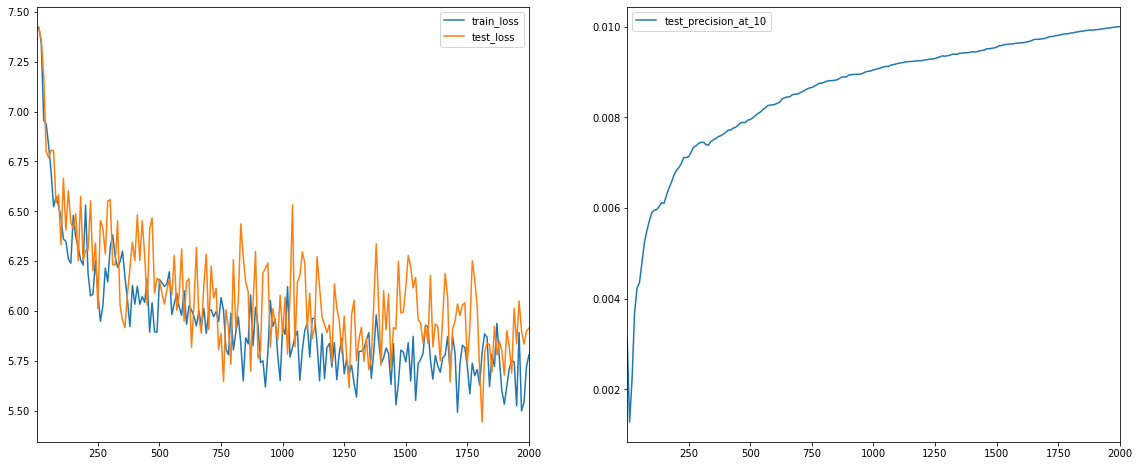

In [0]:
# Khởi tạo hàm số giúp embedding các category sang véc tơ embedding.
def _embedding_category_col(key, embedding_dim, table_name = 'movies'):
  """
  key: tên cột dạng category cần khởi tạo vocabulary, tên cột phải trùng với tên các key trong features dict của batch
  embedding_dim: số chiều dữ liệu được sử dụng để nhúng các categorical_column
  """
  if table_name == 'movies':
    # Khởi tạo vocabulary cho các giá trị của column key.
    if key == 'genre':
      list_gens = list(set([gen for movie_gens in movies['all_genres'] for gen in movie_gens]))
      categorical_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=key, vocabulary_list=list_gens, num_oov_buckets=0)
    else:
      categorical_col = tf.feature_column.categorical_column_with_vocabulary_list(
          key=key, vocabulary_list=list(set(movies[key].values)), num_oov_buckets=0)
  elif table_name == 'users':
    categorical_col = tf.feature_column.categorical_column_with_vocabulary_list(
        key=key, vocabulary_list=list(set(users[key].values)), num_oov_buckets=0)
  # Trả về embedding véc tơ từ dictionary.
  return tf.feature_column.embedding_column(
      categorical_column=categorical_col, dimension=embedding_dim,
      combiner='mean')

with tf.Graph().as_default():
  softmax_model = init_softmax_model(
      user_rates,
      embedding_cols=[
          _embedding_category_col("movie_id", 35),
          _embedding_category_col("genre", 3),
          _embedding_category_col("year", 2),
          _embedding_category_col("age", 3, "users"),
          _embedding_category_col("sex", 2, "users"),
          _embedding_category_col("occupation", 3, "users")
      ],
      hidden_dims=[35])

softmax_model.train(learning_rate=5., num_iterations=2000, optimizer=tf.train.AdagradOptimizer)

Hàm `_embedding_category_col()` sẽ lần lượt thực hiện các bước sau:

* Khởi tạo một vocabulary cho một column dạng category bằng hàm `tf.feature_column.categorical_column_with_vocabulary_list()`. Khi đó mỗi một nhóm của category là một phần tử của vocabulary.

* Tiếp theo map một giá trị bất kì vào véc tơ one-hot có số chiều bằng với kích thước của `vocabulary`. Sau đó điều chỉnh lại độ dài của one-hot véc tơ bằng cách đi qua tiếp một layer dense có số units bằng `embedding_dim`. Tất cả quá trình này được thực hiện thông qua hàm: `tf.feature_column.embedding_column()`

Như vậy thông qua hàm `_embedding_category_col()` ta có thể map một trường đầu vào dạng category bất kì sang một không gian véc tơ với số chiều tùy ý.

# 5. Sử dụng mô hình để recommendation

## 5.1. Tìm kiếm sản phẩm tương đồng.
Để đo lương mức độ tương đồng giữa các sản phẩm ta có thể tính toán các chỉ số cosine_similarity hoặc dot product giữa các véc tơ nhúng của chúng. Véc tơ embedding được trích xuất chính là ma trận layers cuối cùng của mạng neural network. Bên dưới lần lượt là các công thức dot product và cosine similarity giữa 2 véc tơ $\mathbf{v}_i$ và $\mathbf{v}_j$.

* Dot product:
$$\langle \mathbf{v}_i, \mathbf{v}_j \rangle = \sum_{m=1}^{k} v_{im}v_{mj}$$

* Cosine similarity:
$$\text{cosine_similarity}(\mathbf{v}_i, \mathbf{v}_j) = \frac{\langle\mathbf{v}_i, \mathbf{v}_j\rangle}{\|\mathbf{v}_i\|\|\mathbf{v}_j\|}$$

Hàm `_compute_similarity()` sẽ có tác dụng tính ra các chỉ số tương quan giữa véc tơ nhúng item với ma trận nhúng gồm toàn bộ các items theo công thức `dot product` hoặc `cosine similarity`.

In [0]:
DOT = 'dot'
COSINE = 'cosine'
def _compute_similarity(query_embedding, item_embeddings, measure=DOT):
  """Tính điểm số giữa câu query và item embedding.
  Args:
    query_embedding: là một vector nhúng của query kích thước [k].
    item_embeddings: là ma trận nhúng véc tơ các items kích thước [N, k].
    measure: là một chuỗi string xác định kiểu đo lường tương đương được sử dụng. Có thể là theo phương pháp 'dot similarity' hoặc 'cosine similarity'.
  Returns:
    scores: một véc tơ kích thước [N], sao cho score[i] là điểm của item i được cho bởi query.
  """
  u = query_embedding
  V = item_embeddings
  if measure == COSINE:
    V = V / np.linalg.norm(V, axis=1, keepdims=True)
    u = u / np.linalg.norm(u)
  scores = u.dot(V.T)
  return scores

Tiếp theo dựa trên hàm `_compute_similarity()`, ta có thể tìm ra được danh sách các sản phẩm tương đồng nhất với một sản phẩm bất kì.

In [0]:
def _movie_similarity(model, movie_id, measure=DOT, k=10):
  # Lọc ra title của bộ phim
  titles = movies[movies['movie_id']==str(movie_id)]['title'].values
  print('movie title: {}'.format(titles))
  if len(titles) == 0:
    raise ValueError("Found no movies with movie_id %s" % movie_id)
  print("Nearest neighbors of : %s." % titles[0])
  scores = compute_scores(
      model.embeddings["movie_id"][movie_id], model.embeddings["movie_id"],
      measure)
  score_key = measure + ' score'
  df = pd.DataFrame({
      score_key: list(scores),
      'titles': movies['title'],
      'genres': movies['all_genres']
  })
  return df.sort_values([score_key], ascending=False).head(k)

Bên dưới chúng ta sẽ cùng tìm ra top 10 các bộ phim liên quan nhất đến một bộ phim kinh dị đó là `Blood For Dracula (Andy Warhol's Dracula) (1974)` có `movie_id=666` là một bộ phim về ma cà rồng và thuộc thể loại phim kinh dị.

In [301]:
_movie_similarity(softmax_model, movie_id=666, measure=COSINE, k=20)

movie title: ["Blood For Dracula (Andy Warhol's Dracula) (1974)"]
Nearest neighbors of : Blood For Dracula (Andy Warhol's Dracula) (1974).


,cosine score,titles,genres
666,1.000000,Audrey Rose (1977),[Horror]
444,0.920122,"Body Snatcher, The (1945)",[Horror]
564,0.900972,Village of the Damned (1995),"[Horror, Thriller]"
668,0.884781,Body Parts (1991),[Horror]
853,0.872900,Bad Taste (1987),"[Comedy, Horror]"
1272,0.864216,Color of Night (1994),"[Drama, Thriller]"
634,0.850382,"Fog, The (1980)",[Horror]
859,0.845901,"Believers, The (1987)","[Horror, Thriller]"
439,0.836006,Amityville II: The Possession (1982),[Horror]
589,0.835799,Hellraiser: Bloodline (1996),"[Action, Horror, Sci-Fi]"


Ta nhận thấy toàn bộ các bộ phim liên quan nhất đều thuộc về thể loại `Horror` hoặc `Thriller` và cùng thể loại với bộ phim kinh dị trên. Điều này cho thấy thuật toán đã giúp tìm ra các sản phẩm tương đồng khá chính xác.

## 5.2. Phân cụm các sản phẩm

Để nhận biết thuật toán recommendation có tính cá nhân hóa cao hay không, ta sẽ giảm chiều dữ liệu của những véc tơ nhúng xuống không gian 2 chiều và tìm cách biểu diễn chúng theo các nhóm thể loại phim. Nếu các điểm phân bố tập trung theo cụm tương ứng với từng thể loại thì chứng tỏ thuật toán giúp nhận biết khá tốt tính chất khác biệt giữa các bộ phim. Để giảm chiều dữ liệu từ 35 chiều xuống 2 chiều ta sử dụng thuật toán [TNSE](https://distill.pub/2016/misread-tsne/).

In [270]:
from sklearn.manifold import TSNE
import time

X = softmax_model.embeddings['movie_id']

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
X2D = tsne.fit_transform(X)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1682 samples in 0.003s...
[t-SNE] Computed neighbors for 1682 samples in 0.239s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1682
[t-SNE] Computed conditional probabilities for sample 1682 / 1682
[t-SNE] Mean sigma: 0.575077
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.237450
[t-SNE] KL divergence after 300 iterations: 1.419350
t-SNE done! Time elapsed: 5.158601522445679 seconds


Khi đó dữ liệu của các bộ phim đã được giảm về còn 2 chiều tương ứng với `X2D`. Tiếp theo ta sẽ xác định nhãn thể loại cho từng bộ phim. Do nhãn là duy nhất nên đối với những bộ phim được gán nhiều thể loại thì ta sẽ lấy ra ngẫu nhiên 1 làm đại diện.

In [0]:
y = [np.random.choice(genres) for genres in movies['all_genres']]
print('y.shape: {}'.format(len(y)))
print('X2D.shape: {}'.format(X2D.shape))

y.shape: 1682
X2D.shape: (1682, 2)


Vẽ biểu đồ scatter biểu diễn tọa độ giảm chiều của các bộ phim theo thể loại trong không gian 2 chiều.

In [272]:
genres = list(set(y))
N = len(genres)

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
cmap = get_cmap(N)
cmap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

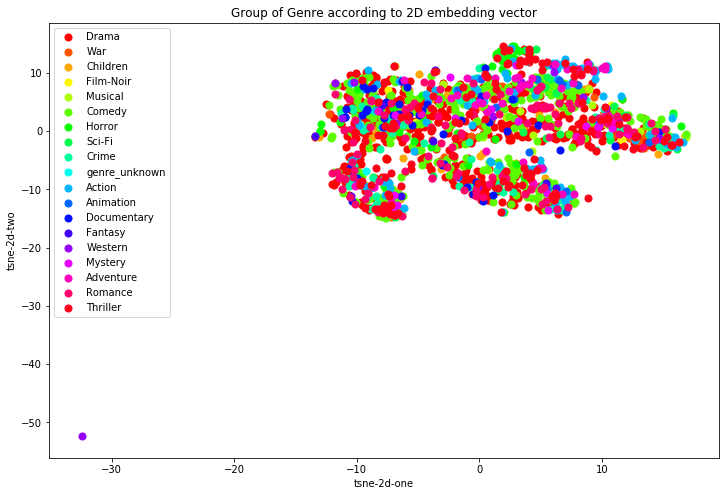

In [273]:
def _filter_genre_id(y, genre):
  return [True if item == genre else False for item in y]

plt.figure(figsize = (12, 8))
for i, genre in enumerate(genres):
  ids = _filter_genre_id(y, genre)
  plt.scatter(X2D[ids, 0], X2D[ids, 1], s=50, c=cmap(i), label=genre)
plt.title('Group of Genre according to 2D embedding vector')
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.legend()
plt.show()

Visualize chỉ riêng một số thể loại phim gồm `['Children', 'Animation', 'Action', 'Horror', 'Musical']`.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

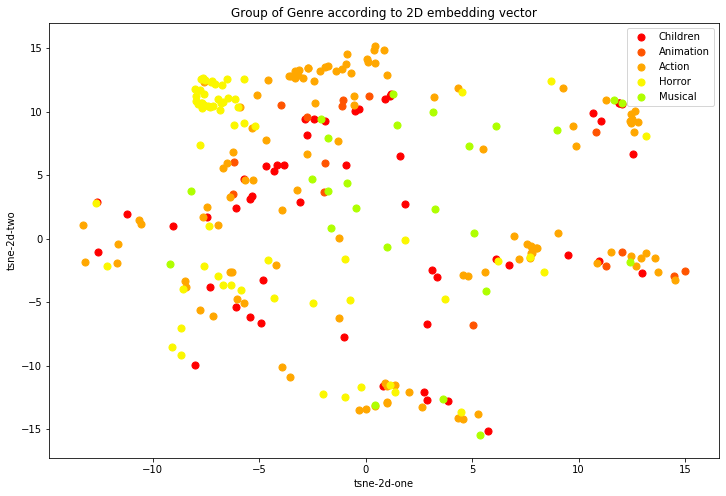

In [269]:
genres=['Children', 'Animation', 'Action', 'Horror', 'Musical']

plt.figure(figsize = (12, 8))
for i, genre in enumerate(genres):
  ids = _filter_genre_id(y, genre)
  plt.scatter(X2D[ids, 0], X2D[ids, 1], s=50, c=cmap(i), label=genre)
plt.title('Group of Genre according to 2D embedding vector')
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.legend()
plt.show()

Ta nhận thấy đối với một số loại hình phim có số lượng quan sát nhỏ, đặc biệt và kén khách thì phân bố của chúng khá tập trung như: `['Children', 'Animation', 'Action', 'Horror', 'Musical']`. Điều này cho thấy thuật toán khá có hiệu quả trong việc nhận diện các đặc trưng cá nhân hóa của các thể loại phim khác nhau.

Một số điểm phân tán có thể là do rất nhiều các bộ phim thuộc về ít nhất từ 2 thể loại trở nên nên việc phân chúng vào ngẫu nhiên một nhóm sẽ có thể dẫn đến cùng một thể loại phim nhưng được phần mảnh thành nhiều cụm clusters tách biệt.



# 6. Tổng kết

Trên đây tôi đã giới thiệu đến các bạn một trong những ứng dụng cơ bản nhất của recommendation sử dụng deep learning đó là xây dựng một mạng neural network dạng gồm toàn bộ các fully connected layer. Kiến trúc này có thể tận dụng được đồng thời rất nhiều các thông tin cả về phía user, sản phẩm và lịch sử tương tác giữa user, sản phẩm. Do đó thông tin chúng học được để biểu diễn các véc tơ user và items có tính cá nhân hóa cao. Khi sử dụng thuật toán để khuyến nghị tìm kiếm các sản phẩm tương đồng sẽ cho kết quả khá chuẩn xác.

Ngoài phương pháp nêu trên chúng ta còn có thể sử dụng thêm rất nhiều các phương pháp khác trong deep learning. Các bạn có thể xem ở phần giới thiệu `các phương pháp recommendation` tại [Bài 15 - collaborative và content-based filtering](https://phamdinhkhanh.github.io/2019/11/04/Recommendation_Compound_Part1.html). Có thể ở những bài sau tôi sẽ tiếp tục giới thiệu một số phương pháp deep learning khác nữa. 

Bài viết có sử dụng rất nhiều các tài liệu tham khảo được liệt kê mục 7.


# 7. Tài liệu tham khảo.

1. [Negative Sampling - Distributed Representations of Words and Phrases
and their Compositionality - Tomas Mikolov. etc](https://arxiv.org/pdf/1310.4546.pdf)

2. [applying word2vec to recommenders and advertising - Chris McCormick](http://mccormickml.com/2018/06/15/applying-word2vec-to-recommenders-and-advertising/)

3. [Deep Learning based Recommender System: A Survey and New Perspectives - shuai zhang. etc](https://arxiv.org/pdf/1707.07435.pdf)

4. [Approxiamting softmax technical - Sebastian Ruder](https://ruder.io/word-embeddings-softmax/)

5. [Negative sampling - Jason Tam](https://tech.hbc.com/2018-03-23-negative-sampling-in-numpy.html)

6. [recommendation - google course](https://developers.google.com/machine-learning/recommendation/content-based/basics)


**Làm sao để điền giá trị missing đối với những bộ phim chưa được rating?**

Đối với nhóm thông tin lịch sử rating của khách hàng. Những bộ phim chưa được rate chiếm số lượng rất lớn và chúng ta cần điền giá trị bao nhiêu thì hợp lý? Thông thường nếu coi đây là những véc tơ sparse thì ta sẽ để missing value bằng 0. Tuy nhiên một khách hàng nếu được rate thực sự sẽ không bao giờ rate phần lớn các bộ phim 0 điểm. Giá trị đâu đó sẽ xoay quan trung bình hoặc trung vị các điểm đã rate. Như vậy ta có thể coi đây là một bài toán xử lý missing value thông thường và dựa trên nhiều phương pháp khác nhau như thay thế missing value bằng trung bình, trung vị hoặc mode.

Nếu sử dụng mode thì thường sẽ không chuẩn xác vì kích thước mẫu của các sản phẩm được rating chỉ vào khoảng vài chục sản phẩm. Do đó mode sẽ không thể đại diện cho toàn bộ các sản phẩm bao gồm cả chưa được rate.

Như vậy chúng ta có thể sử dụng trung bình hoặc trung vị tùy theo lựa chọn của bạn. Ở đây mình sẽ sử dụng fill missing bằng trung bình.



**Chuẩn hóa đầu vào như thế nào?**

Để tác động giữa các biến lên xác suất yêu thích một sản phẩm của khách hàng không chịu ảnh hưởng bởi thang đo thì chúng ta sẽ sử dụng phương pháp chuẩn hóa về phân phối chuẩn theo công thức:

$$x = \frac{x-\bar{\mathbf{x}}}{\sigma(\mathbf{x})}$$

Khi đó toàn bộ các biến sẽ có cùng phân phối. Do quá trình xây dựng mô hình giả định ta chỉ biết đến dữ liệu là tập train nên quá trình chuẩn hóa sẽ được thực hiện chỉ trên tập train. Chúng ta sẽ tìm ra các tham số đặc trưng của phân phối như trung bình và phương sai $N(\mu, \sigma^2)$ chỉ trên tập train. Sau đó sử dụng các tham số này để chuẩn hóa lại khi thực hiện kiểm định trên tập test. Không nên chuẩn hóa cho toàn bộ tập dữ liệu rồi sau đó mới chia mẫu train/test vì phân phối chung trên toàn bộ tập dữ liệu là chưa biết.

# 3.1. Chuẩn hóa dữ liệu

Ở bước này ta sẽ thực hiện các công việc như chuyển biến từ category sang numeric. Mã hóa chuỗi lịch sử rating sang các véc tơ rating. Mã hóa xác suất giá trị rating ở output sang xác suất.

**Chuẩn hóa véc tơ người dùng:** Chúng ta sẽ chuẩn hóa véc tơ người dùng như sau:

In [0]:
# from sklearn.preprocessing import LabelBinarizer

# columns = ['sex', 'age', 'occupation']
# for i, col in enumerate(columns):
#   enc = LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)
#   enc.fit(users[col])
#   col_end = enc.transform(users[col])
#   if i == 0:
#     user_enc = col_end
#   else:
#     user_enc = np.concatenate([user_enc, col_end], axis = 1)

Hoặc một cách thức khác đơn giản hơn để one-hot encoding các biến category trên pandas mà không cần sử dụng `LabelBinarizer` đó là áp dụng hàm `pd.get_dummies()`. Hàm số này sẽ tự động tìm các trường định dạng `object` trong data frame để biến đổi one-hot rất nhanh chóng.

In [0]:
# # Chuyển định dạng age và occupation sang object
# user_dum = users[['sex', 'age', 'occupation']].copy()
# user_dum['age'] = user_dum['age'].apply(str)
# user_dum['occupation'] = user_dum['occupation'].apply(str)
# user_dum = pd.get_dummies(user_dum[['sex', 'age', 'occupation']])
# user_dum.index = users['user_id']
# user_dum.head()

Theo cách này chúng ta còn biết được ngay các cột tương ứng với thông tin gì. Ví dụ `occupation_0 = 1` khách hàng có nghề nghiệp thuộc nhóm `0`.

**Chuẩn hóa véc tơ lịch sử rating:** Để tạo được véc tơ lịch sử rating của khách hàng ta cần phải xác định khách hàng đó đã rating sản phẩm gì? Sản phẩm đó nằm ở index thứ bao nhiêu trong véc tơ rating. Gía trị rating là bao nhiêu? Sau khi xác định được những thông tin trên ta sẽ khởi tạo véc tơ rating và sau đó thay giá trị `NaN` của từng user bằng trung bình của các lượt rating của user đó. hàm `pivot_table` trong pandas sẽ giúp ta thực hiện việc này khá dễ dàng.

In [0]:
# import numpy as np

# df_piv_rating = pd.pivot_table(ratings_train, index=['user_id'],
#                columns=['movie_id'],
#                values = ['rating'],
#                aggfunc={'rating':np.mean})

# df_piv_rating.head()

Thay thế những giá trị `NaN` băng trung bình giá trị rating của từng user để thu được véc tơ rating.

In [0]:
# # df_piv_rating = df_piv_rating.apply(lambda x: x.fillna(x.mean()), axis=1)
# df_piv_rating.fillna(0, inplace=True)
# df_piv_rating.head()

Như vậy véc tơ input của mô hình sau khi kết hợp thông tin người dùng và véc tơ lịch sử rating sẽ là:

In [0]:
# df_users = pd.concat([user_dum, df_piv_rating], axis=1)
# df_users.head()

In [0]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_train)
# X_train_transform = scaler.transform(X_train)
# X_train_transform.shape

In [0]:
# y_train = df_piv_rating.apply(lambda x: _minmax_scaling(x), axis=1)

In [0]:
# df_piv_rating.head()
# ratings.head()

Tiếp theo ta cần join thông tin rating (bảng `ratings_train`) với thông tin khách hàng và lịch sử rating (bảng `df_piv_rating`) và thông tin về sản phẩm (bản items). Do số chiều dữ liệu sau khi join là cực kì lớn, khoảng 3500 chiều x 1 triệu quan sát nên không thể huấn luyện được bằng việc training. Do đó ta phải xây dựng một DataGenerator để truyền dữ liệu theo từng batch.

Ngoài ra khi xử lý output là giá trị điểm rating ta có thể có 2 phương án: Coi mỗi thứ hạng rating là một nhóm độc lập và xây dựng bài toán phân loại nhiều nhãn. Hoặc coi các giá trị rating là những biến thứ bậc, chuẩn hóa giá trị rating về véc tơ thứ bậc và hồi qui như mô hình dạng thứ bậc. Trong trường hợp hồi qui thứ bậc, các thứ hạng sẽ được biến đổi sang véc tơ như sau:

$$
1 \rightarrow [1, 0, 0, 0, 0] \\
2 \rightarrow [1, 1, 0, 0, 0] \\
3 \rightarrow [1, 1, 1, 0, 0] \\
4 \rightarrow [1, 1, 1, 1, 0] \\
5 \rightarrow [1, 1, 1, 1, 1] \\
$$

Thông thường với những bài toán mà các classes không bình đẳng mà có tính thứ bậc thì lựa chọn mô hình dạng thứ bậc sẽ mang lại kết quả tốt hơn. Các bạn có thể xem thêm về phương pháp hồi qui multi regression dạng thứ bậc tại bài [Chẩn đoán bệnh võng mạc đái tháo đường với Deep Learning - Phan Hoàng](https://viblo.asia/p/deep-learning-chan-doan-benh-vong-mac-dai-thao-duong-voi-deep-learning-diabetic-retinopathy-kaggle-competition-gDVK2G6jZLj)

In [0]:
# # Tạo data generator.
# from tensorflow.python.keras.utils.data_utils import Sequence

# import numpy as np
# import keras

# class DataGenerator(Sequence):
#     'Generates data for Keras'
#     def __init__(self, df_ratings, df_users, df_items, batch_size=32, input_shape = 3732, out_shape=(5), shuffle=True):
#         'Initialization'
#         self.input_shape = input_shape
#         self.out_shape = out_shape
#         self.batch_size = batch_size
#         self.df_ratings = df_ratings
#         self.df_users = df_users
#         self.df_items = df_items
#         self.n_obs = df_ratings.shape[0]
#         self.indexes = np.arange(self.n_obs)
#         self.shuffle = shuffle
#         self.on_epoch_end()

#     def __len__(self):
#         'Denotes the number of batches per epoch'
#         return int(self.n_obs / self.batch_size)

#     def __getitem__(self, index):
#         'Generate one batch of data'
#         # Generate indexes of the batch
#         indexes_temp = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

#         # Generate data
#         X, y = self.__data_generation(indexes_temp)

#         return X, y

#     def on_epoch_end(self):
#         'Updates indexes after each epoch'
#         self.indexes = np.arange(len(self.indexes))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

#     def _y_ordi_multi_reg(self, rate):
#         'Convert into ordinary vector from rate'
#         assert rate <= 5
#         ones = np.ones(rate)
#         zeros = np.zeros(5-rate)
#         y = np.concatenate([ones, zeros])
#         return y

#     def _data_gen_uid_mid(self, userID, movieID):
#         'Generates input data containing userID information and movieID' 
#         # Initialization
#         # User must have been rated product
#         if userID in self.df_ratings['user_id']:
#           X_user = self.df_users.loc[userID].values.T.reshape(1, -1)
#         else:
#           raise('userID do not exists!')
#         # Truncate or padding user:
#         max_his_items = self.input_shape-19
#         new_col = max_his_items-self.df_users.shape[1]
#         if new_col > 0:
#           X_user = np.pad(X_user, [[0, 0], [0, new_col]])
#         elif new_col < 0:
#           X_user = X_user[:, :max_his_items]
#         # Merge with items
#         df_items = self.df_items[self.df_items['movie_id']==movieID].drop(['movie_year', 'genre', 'movie_title', 'movie_id'], axis=1).values
#         X = np.concatenate([X_user, df_items], axis = 1)
#         return X

#     def __data_generation(self, indexes_temp):
#         'Generates data containing batch_size samples' 
#         # Initialization
#         df_ratings_sub = self.df_ratings.iloc[indexes_temp, :]
#         # Truncate or padding user:
#         max_his_items = self.input_shape-19
#         df_users_adj = self.df_users.copy()
#         new_col = max_his_items-self.df_users.shape[1]
#         if new_col > 0:
#           for i in np.arange(new_col):
#             col_name = 'pad_'+str(i)
#             df_users_adj[col_name] = 0
#         elif new_col < 0:
#           df_users_adj = self.df_users.iloc[:, :max_his_items]
#         # Merge with users
#         df_ratings_users_sub = pd.merge(df_ratings_sub, df_users_adj.reset_index(), how='inner', left_on='user_id', right_on='user_id')
#         # Merge with items
#         df_items = self.df_items.drop(['movie_year', 'genre', 'movie_title'], axis=1)
#         df_ratings_users_items = pd.merge(df_ratings_users_sub, df_items, how='inner', left_on='movie_id', right_on='movie_id')
#         # Output values
#         X = df_ratings_users_items.iloc[:, 4:].values
#         y = np.array([yi for yi in df_ratings_users_sub['rating'].apply(lambda x: self._y_ordi_multi_reg(x))])
#         return X, y

# train_gen = DataGenerator(
#     df_ratings=ratings_train, df_users=df_users, df_items=items,
#     batch_size=128, out_shape=(5), shuffle=True
# ) 

# train_gen._data_gen_uid_mid(userID=1, movieID=5)[0].shape

* Hàm `__data_generation()` có tác dụng khởi tạo batch, Trong hàm này ta trích suất ra các giá trị rating của các cặp (user_id, movie_id). Sau đó join các thông tin về `user_id` và `movie_id` vào để khởi tạo véc tơ input `X`. Véc tơ output `y` được chuyển đổi sang dạng véc tơ thứ bậc từ điểm `rating` nhờ hàm `_y_ordi_multi_reg()`.

* Hàm `__data_gen_uid_mid()` có tác dụng khởi tạo véc tơ input `X` nhằm dự đoán phân phối thứ bậc khi một `user_id` bất kì rating một `movie_id` bất kì.

Bên dưới ta sẽ khởi tạo 2 generator cho tập train và test. Đối với tập train sẽ lấy batch_size = 128 và tập test là 64.


In [0]:
# train_gen = DataGenerator(
#     df_ratings=ratings_train, df_users=df_users, df_items=items,
#     batch_size=128,  input_shape = 3732, out_shape=(5), shuffle=True
# )

# val_gen = DataGenerator(
#     df_ratings=ratings_test, df_users=df_users, df_items=items,
#     batch_size=64,  input_shape = 3732, out_shape=(5), shuffle=True
# )

Tiếp theo ta sẽ xây dựng kiến trúc mạng neural network cho mô hình recommendation. Trong kiến trúc này chúng ta sẽ sử dụng đầu vào gồm 3732 chiều bao gồm 30 chiều one-hot liên quan đến các thông tin của user như giới tính, độ tuổi, nghề nghiệp và 3683 chiều liên quan đến lịch sử rating và 19 chiều liên quan đến thông tin về sản phẩm như thể loại, năm sản xuất. Đầu ra của mô hình là véc tơ rating gồm 5 chiều đã được qui đổi sang dạng phù hợp với mô hình hồi qui thức bậc. Để kiểm tra shape của input và output ta có thể test thông qua hàm:

In [0]:
# X_batch_0, y_batch_0 = train_gen.__getitem__(0)
# print('input batch shape: ', X_batch_0.shape)
# print('output batch shape: ', y_batch_0.shape)

In [0]:
# from tensorflow.keras.layers import Dense, Input, Activation, BatchNormalization
# from tensorflow.keras import Model
# from tensorflow.keras.optimizers import Adam, SGD
# from tensorflow.keras.backend import dot

# def _rec_neu_net_model(input_shape, output_shape, embedding_size=1000):
#   inputs = Input(shape=(input_shape,))
#   batch_norm = BatchNormalization()(inputs)
#   hid = Dense(embedding_size, activation='relu', name='den1')(batch_norm)
#   outputs = Dense(output_shape, activation='sigmoid', name='den2')(hid)
#   model = Model(inputs=inputs, outputs=outputs)
#   model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
#   model.summary()
#   return model

# model = _rec_neu_net_model(input_shape=X_batch_0.shape[1], \
#                            output_shape=y_batch_0.shape[1], \
#                            embedding_size=X_batch_0.shape[1])

Mô hình gồm có 4 layers. Layer batch_normalization sẽ chuẩn hóa đầu vào và giúp cho quá trình huấn luyện của thuật toán nhanh hơn. Layer dense thứ nhất được coi như là embedding véc tơ của bộ phim (có số chiều bằng với véc tơ input). Từ đầu ra của layers này, sau khi đi qua sigmoid fuction ở layer dense thứ 2, ta sẽ thu được phân phối xác suất của giá trị véc tơ thứ bậc ở đầu ra. Khi muốn so sánh tính tương đồng của các bộ phim ta có thể sử dụng các véc tơ embedding. 

Bên dưới ta sẽ huấn luyện mô hình với số lượng epochs = 1 (cho nhanh, hehe).

In [0]:
# from tensorflow.keras.callbacks import EarlyStopping

# model.fit_generator(train_gen,
#     steps_per_epoch=len(train_gen),
#     validation_data=val_gen,
#     validation_steps=len(val_gen),
#     epochs=1,
#     callbacks=[EarlyStopping(patience=2, min_delta=0.00001, monitor='loss')])

In [0]:
# model.load_weights('model_rec_zero_fill.h5')

In [0]:
# model.save('model_rec_zero_fill.h5')

Như vậy kết quả cho thấy mô hình có độ chính xác khá cao khi rơi vào khoảng 93%

# Ma trận embedding của các bộ phim

Chúng ta có thể coi ma trận nhúng của các bộ phim là những véc tơ của layer dense thứ nhất trước layer output có kích thước là 1000 chiều. Chúng ta có thể recommend những sản phẩm tương tự cho user nếu biết rằng user đã yêu thích một sản phẩm nào đó gần đây bằng cách dựa trên độ đo `cosine similarity` hoặc chỉ dựa trên độ đo là tích `dot product` giữa các bộ phim như sau:

* dot product: $\langle \mathbf{v}_i, \mathbf{v}_j \rangle = \mathbf{v}_i^T\mathbf{v}_j$
* cosine: $\text{cosine}(\mathbf{v}_i, \mathbf{v}_j) = \frac{\mathbf{v}_i^T\mathbf{v}_j}{||\mathbf{v}_i||_2||\mathbf{v}_j||_2}$

Cụ thể ta thực hiện như sau:

In [0]:
# model_sim = Model(inputs=model.input, outputs=model.get_layer('den1').output)

# DOT = 'dot'
# COSINE = 'cosine'
# def compute_scores(query_embedding, item_embeddings, measure=DOT):
#   """Computes the scores of the candidates given a query.
#   Args:
#     query_embedding: a vector of shape [k], representing the query embedding.
#     item_embeddings: a matrix of shape [N, k], such that row i is the embedding
#       of item i.
#     measure: a string specifying the similarity measure to be used. Can be
#       either DOT or COSINE.
#   Returns:
#     scores: a vector of shape [N], such that scores[i] is the score of item i.
#   """
#   if measure == 'dot':
#     scores = [np.dot(query_embedding, item_embedding) for item_embedding in item_embeddings]
#   elif measure == 'cosine':
#     scores = [np.dot(query_embedding, item_embedding)/(np.linalg.norm(query_embedding)*np.linalg.norm(item_embedding)) for item_embedding in item_embeddings]
#     scores = np.array(scores)
#   return scores

In [0]:
# def _recommend_user(userID, k_top=5):
#   X = np.array([train_gen._data_gen_uid_mid(userID=userID, movieID=i)[0] for i in items['movie_id'].unique()])
#   y = model.predict(X)
#   y_rating = np.sum(y, axis = 1)
#   ids = np.argsort(y_rating)[::-1][:k_top]
#   return items[items['movie_id'].isin(ids)].iloc[:, :3]

In [0]:
# users.head()

In [0]:
# _recommend_user(1, k_top=10)

In [0]:
# pd.merge(ratings[ratings['user_id']==1], items.iloc[:, :3], left_on='movie_id', right_on='movie_id').sort_values('rating', ascending = False).head(20)

Ưu điểm của lơp mô hình recommendation theo mạng neural đó là:

* Chúng ta kết hợp được cả 2 loại thông tin của users, items và lịch sử rating của user để dự báo rating. Trong khi theo phương pháp content-based thì chỉ áp dụng được các chiều thông tin liên quan đến chỉ users hoặc các chiều thông tin liên quan đến chỉ items. Trên thực tế thị hiếu của khách hàng lại được giải thích bởi chính các đặc điểm của users và cả các đặc tính của items. Do đó giúp gia tăng độ chính xác cho kết quả dự báo.

* Số lượng thông tin có thể đưa thêm vào mô hình xem như là mở rộng vô hạn. Do đó rất phù hợp với những hệ thống lớn, có nhiều trường thông tin về khách hàng và sản phẩm. Các thông tin cũng có thể ngày càng bổ sung thêm qua các version của mô hình.

* Những biến được sử dụng trong các phương pháp matrix factorization như collaborative filtering chỉ là những nhân tố ẩn không xác định. Trong khi các thông tin đưa vào mô hình recommendation neural network là thông tin liên quan đến người dùng và thể hiện trực tiếp hành vi và sở thích của người dùng. Chẳng hạn tôi lấy ví dụ: trường về ngôn ngữ của bạn sẽ có ảnh hưởng rất lớn đến video mà bạn theo dõi vì một người sẽ thường chỉ xem các video có xuất xứ từ quốc gia đó. Hoặc nếu bạn là thiếu nhi thì sẽ chỉ phù hợp để xem các nội dung video thiếu nhi.


## Tách user và item riêng


In [0]:
# # Tạo data generator.
# from tensorflow.python.keras.utils.data_utils import Sequence

# import numpy as np
# import keras

# class DataGenerator(Sequence):
#     'Generates data for Keras'
#     def __init__(self, df_ratings, df_users, df_items, batch_size=32, embed_size=3732, out_shape=(5), shuffle=True):
#         'Initialization'
#         self.batch_size = batch_size
#         self.df_ratings = df_ratings
#         self.df_users = df_users
#         self.embed_size = embed_size
#         self.df_items = self._pad_trun(df_items, df_items.shape[1], self.embed_size).copy()
#         self.n_obs = df_ratings.shape[0]
#         self.indexes = np.arange(self.n_obs)
#         self.shuffle = shuffle
#         self.on_epoch_end()

#     def __len__(self):
#         'Denotes the number of batches per epoch'
#         return int(self.n_obs / self.batch_size)

#     def __getitem__(self, index):
#         'Generate one batch of data'
#         # Generate indexes of the batch
#         indexes_temp = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

#         # Generate data
#         X, y = self.__data_generation(indexes_temp)

#         return X, y

#     def on_epoch_end(self):
#         'Updates indexes after each epoch'
#         self.indexes = np.arange(len(self.indexes))
#         if self.shuffle == True:
#             np.random.shuffle(self.indexes)

#     def _y_ordi_multi_reg(self, rate):
#         'Convert into ordinary vector from rate'
#         assert rate <= 5
#         ones = np.ones(rate)
#         zeros = np.zeros(5-rate)
#         y = np.concatenate([ones, zeros])
#         return y

#     def _pad_trun(self, X, old_width, new_width):
#         delta_shape = new_width - old_width
#         if isinstance(X, np.ndarray):
#           if delta_shape<0:
#             X = X[:, new_width]
#           else:
#             X = np.pad(X, [[0, 0], [0, delta_shape]])
#         else:
#           if delta_shape<0:
#             X = X.iloc[:, :new_width]
#           else:
#             for i in np.arange(delta_shape):
#               col_name = 'pad_zero_'+str(i)
#               X[col_name] = 0
#         return X

#     def _data_gen_uid_mid(self, userID, movieID):
#         'Generates input data containing userID information and movieID' 
#         # Initialization
#         # User must have been rated product
#         if userID in self.df_ratings['user_id']:
#           X_user = self.df_users.loc[userID].values.T.reshape(1, -1)
#         else:
#           raise('userID do not exists!')
#         # Truncate or padding user:
#         X_user = self._pad_trun(X_user, X_user.shape[1], self.embed_size)
#         # Item value
#         X_item = self.df_items[self.df_items['movie_id']==movieID].drop(['movie_year', 'genre', 'movie_title', 'movie_id'], axis=1).values
#         X_item = self._pad_truc(X_item, X_item.shape[1], self.embed_size)
#         return X_user, X_item

#     def __data_generation(self, indexes_temp):
#         'Generates data containing batch_size samples' 
#         # Initialization
#         df_ratings_sub = self.df_ratings.iloc[indexes_temp, :]
#         # Truncate or padding user:
#         df_users_adj = self.df_users.copy()
#         df_users_adj = self._pad_trun(df_users, df_users_adj.shape[1], self.embed_size)
#         # new_col = max_his_items-self.df_users.shape[1]
#         # if new_col > 0:
#         #   for i in np.arange(new_col):
#         #     col_name = 'pad_'+str(i)
#         #     df_users_adj[col_name] = 0
#         # elif new_col < 0:
#         #   df_users_adj = self.df_users.iloc[:, :max_his_items]
#         # X users
#         X_user = pd.merge(df_ratings_sub, df_users_adj.reset_index(), how='inner', left_on='user_id', right_on='user_id').iloc[:, 4:].values
#         # X items
#         df_items = self.df_items.drop(['movie_year', 'genre', 'movie_title'], axis=1)
#         X_item = pd.merge(df_ratings_sub, df_items, left_on='movie_id', right_on='movie_id').iloc[:, 4:].values
#         X_item = self._pad_trun(X_item, X_item.shape[1], self.embed_size)
#         # Output values
#         y = np.array([yi for yi in df_ratings_sub['rating'].apply(lambda x: self._y_ordi_multi_reg(x))])
#         return (X_user, X_item), y

# train_gen = DataGenerator(
#     df_ratings=ratings_train, df_users=df_users, df_items=items,
#     batch_size=128, embed_size=3732,out_shape=(5), shuffle=True
# ) 

# (X_user_0, X_item_0), y_0 = train_gen.__getitem__(0)

In [0]:
# train_gen = DataGenerator(
#     df_ratings=ratings_train, df_users=df_users, df_items=items,
#     batch_size=128,  embed_size=3732, out_shape=(5), shuffle=True
# )

# val_gen = DataGenerator(
#     df_ratings=ratings_test, df_users=df_users, df_items=items,
#     batch_size=64,  embed_size=3732, out_shape=(5), shuffle=True
# )

In [0]:
# from tensorflow.keras.layers import Dense, Input, Activation, BatchNormalization, Dot, Reshape
# from tensorflow.keras import Model
# from tensorflow.keras.optimizers import Adam, SGD
# from tensorflow.keras.backend import dot

# def _rec_neu_net_model(input_shape, output_shape, embedding_size=1000):
#   inp_user = Input(shape=(input_shape,))
#   batch_norm_user = BatchNormalization()(inp_user)
#   inp_item = Input(shape=(input_shape,))
#   batch_norm_item = BatchNormalization()(inp_item)
#   dot_prod = Dot(axes = 0)([batch_norm_user, batch_norm_item])
#   hid = Reshape((input_shape))(dot_prod)
#   outputs = Dense(output_shape, activation='sigmoid', name='den2')(hid)
#   model = Model(inputs=[inp_user, inp_item], outputs=outputs)
#   model.compile(optimizer=SGD(), loss='categorical_crossentropy', metrics=['accuracy'])
#   model.summary()
#   return model

# model = _rec_neu_net_model(input_shape=X_batch_0.shape[1], \
#                            output_shape=y_batch_0.shape[1], \
#                            embedding_size=X_batch_0.shape[1])

In [0]:
# from tensorflow.keras.callbacks import EarlyStopping

# model.fit_generator(train_gen,
#     steps_per_epoch=len(train_gen),
#     validation_data=val_gen,
#     validation_steps=len(val_gen),
#     epochs=1,
#     callbacks=[EarlyStopping(patience=2, min_delta=0.00001, monitor='loss')])

In [0]:
# train_gen.__getitem__(1)[0][0].shape

NameError: ignored

In [0]:
train_gen.__getitem__(1)[0][0].shape

# Tài liệu tham khảo:
1. [Negative Sampling - Distributed Representations of Words and Phrases
and their Compositionality - Tomas Mikolov. etc](https://arxiv.org/pdf/1310.4546.pdf)

2. [applying word2vec to recommenders and advertising - Chris McCormick](http://mccormickml.com/2018/06/15/applying-word2vec-to-recommenders-and-advertising/)

3. [Deep Learning based Recommender System: A Survey and New Perspectives - shuai zhang. etc](https://arxiv.org/pdf/1707.07435.pdf)

4. [Approxiamting softmax technical - Sebastian Ruder](https://ruder.io/word-embeddings-softmax/)

5. [Negative sampling - Jason Tam](https://tech.hbc.com/2018-03-23-negative-sampling-in-numpy.html)